___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


### Yüksek tahmin başarısı elde etmek için verileri iyi anlamalı ve bağımlı değişkeni etkileyebilecek farklı yaklaşımlar geliştirmelisiniz.(Feature Engineering.)

---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)           # ...'lar engelini aşmak için.
pd.set_option('display.max_rows', 500) 
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#### *ii. Load Dataset*

In [4]:
df = pd.read_csv("treetypes19k.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2868,59,28,0,0,404,228,168,55,400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,3017,27,4,170,35,234,218,230,149,646,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3272,251,31,153,51,2173,138,243,232,3115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,3108,325,11,60,10,2069,191,227,175,1866,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,3102,44,15,97,-2,853,222,205,112,1879,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
df.shape

(9750, 55)

# Elevation ---------> yükseklik ;(m)  nicel
# Aspect -------------> Bakış açısı -----> niceliksel derece olarak görünüş
# Slope ---------------> eğim --------------> niceliksel ----> derece cinsinden
####    Horizontal_Distance_To_Hydrology -----> Hydrolog'a Yatay Mesafe --- > Horz Dist'den en yakın yüzey suyu özelliklerine
####  Vertical_Distance_To_Hydrology -----> Dikey_Mesafe_To_Hidroloji -----> En yakın yüzey suyu özelliklerine Vert Dist
### Horizontal_Distance_To_Roadways / quantitative / meters / En yakın karayoluna Horz Dist
### Hillshade_9am / quantitative / 0 to 255 index / Hillshade indeksi sabah 9'da, yaz gündönümü
### Hillshade_Noon / quantitative / 0 to 255 index / Hillshade indeksi öğlen, yaz gündönümü
###  Hillshade_3pm / quantitative / 0 to 255 index / Hillshade indeksi 15.00'te, yaz gündönümü
####  Horizontal_Distance_To_Fire_Points / quantitative / meters / En yakın orman yangını ateşleme noktalarına Yatay Uzaklık
### Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Toprak Tipi tanımı
### Cover_Type (7 types) / integer / 1 to 7 / Orman Örtüsü Tipi tanımı

## Bu çalışma alanı, kuzey Colorado'daki Roosevelt Ulusal Ormanı'nda bulunan   wilderness areas  içermektedir.Bu alanlar, insan kaynaklı en az rahatsızlığa sahip ormanları temsil eder, bu nedenle mevcut orman örtüsü türleri, orman yönetimi uygulamalarından ziyade ekolojik süreçlerin bir sonucudur.

# Neota (alan 2), muhtemelen 4 vahşi alanın en yüksek ortalama yükseklik değerine sahiptir.
# Rawah (alan 1) ve Comanche Peak (alan 3) daha düşük bir ortalama yükseklik değerine sahip olurken, Cache la Poudre (alan 4) en düşük ortalama yükseklik değerine sahip olacaktır.

## Bu bölgelerdeki başlıca ana ağaç türlerine gelince, Neota'da ladin/köknar (tip 1), Rawah ve Comanche Peak'te birincil türler olarak muhtemelen orman otu (tip 2), ardından ladin/köknar ve titrek kavak (tip 5) olacaktır. ).

## Rawah ve Comanche Peak alanları, ağaç türlerinin çeşitliliği ve tahmine dayalı değişken değerlerinin (yükseklik, vb.) aralığı nedeniyle Neota veya Cache la Poudre'den daha genel veri kümesi için daha tipik olma eğiliminde olacaktır. Cache la Poudre muhtemelen nispeten düşük rakım aralığı ve tür bileşimi nedeniyle diğerlerinden daha benzersizdir.

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9750 entries, 0 to 9749
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           9750 non-null   int64
 1   Aspect                              9750 non-null   int64
 2   Slope                               9750 non-null   int64
 3   Horizontal_Distance_To_Hydrology    9750 non-null   int64
 4   Vertical_Distance_To_Hydrology      9750 non-null   int64
 5   Horizontal_Distance_To_Roadways     9750 non-null   int64
 6   Hillshade_9am                       9750 non-null   int64
 7   Hillshade_Noon                      9750 non-null   int64
 8   Hillshade_3pm                       9750 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  9750 non-null   int64
 10  Wilderness_Area_1                   9750 non-null   int64
 11  Wilderness_Area_2                   9750 non-null   int64
 12  Wilder

In [7]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
count,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000,9750.0000
mean,2772.7381,156.4424,16.0472,230.1214,49.4135,1794.9439,211.9275,219.2314,136.1183,1584.0002,0.2634,0.0347,0.4189,0.2812,0.0171,0.0307,0.0491,0.0448,0.0079,0.0344,0.0000,0.0001,0.0006,0.1209,0.0231,0.0200,0.0333,0.0051,0.0000,0.0050,0.0283,0.0051,0.0044,0.0090,0.0006,0.0248,0.0530,0.0187,0.0005,0.0028,0.0011,0.0008,0.0975,0.0465,0.0241,0.0453,0.0462,0.0012,0.0055,0.0005,0.0015,0.0454,0.0383,0.0242,3.7436
std,411.0729,110.4332,8.2271,209.3826,60.4891,1383.6224,30.3536,22.1603,44.8055,1167.7771,0.4405,0.1829,0.4934,0.4496,0.1298,0.1724,0.2161,0.2069,0.0885,0.1822,0.0000,0.0101,0.0248,0.3261,0.1502,0.1400,0.1795,0.0714,0.0000,0.0707,0.1659,0.0714,0.0663,0.0946,0.0248,0.1556,0.2241,0.1354,0.0226,0.0526,0.0336,0.0286,0.2967,0.2105,0.1534,0.2080,0.2098,0.0351,0.0742,0.0226,0.0392,0.2083,0.1918,0.1537,2.0472
min,1887.0000,0.0000,0.0000,0.0000,-133.0000,0.0000,70.0000,96.0000,0.0000,30.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
25%,2407.0000,63.0000,10.0000,67.0000,5.0000,778.0000,195.0000,208.0000,108.0000,759.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000
50%,2795.0000,126.0000,15.0000,180.0000,31.0000,1362.0000,219.0000,223.0000,139.0000,1315.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000
75%,3131.0000,264.0000,21.0000,331.0000,76.0000,2443.0000,235.0000,235.0000,167.0000,2074.7500,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000
max,3846.0000,359.0000,49.0000,1260.0000,407.0000,6944.0000,254.0000,254.0000,247.0000,7103.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.00

In [9]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column Elevation has 1589 unique values
Column Aspect has 360 unique values
Column Slope has 50 unique values
Column Horizontal_Distance_To_Hydrology has 883 unique values
Column Vertical_Distance_To_Hydrology has 402 unique values
Column Horizontal_Distance_To_Roadways has 3771 unique values
Column Hillshade_9am has 171 unique values
Column Hillshade_Noon has 133 unique values
Column Hillshade_3pm has 243 unique values
Column Horizontal_Distance_To_Fire_Points has 3339 unique values
Column Wilderness_Area_1 has 2 unique values
Column Wilderness_Area_2 has 2 unique values
Column Wilderness_Area_3 has 2 unique values
Column Wilderness_Area_4 has 2 unique values
Column Soil_Type_1 has 2 unique values
Column Soil_Type_2 has 2 unique values
Column Soil_Type_3 has 2 unique values
Column Soil_Type_4 has 2 unique values
Column Soil_Type_5 has 2 unique values
Column Soil_Type_6 has 2 unique values
Column Soil_Type_7 has 1 unique values
Column Soil_Type_8 has 2 unique values
Column Soil_Type_9 

1    1750
2    1750
3    1250
4    1250
5    1250
6    1250
7    1250
Name: Cover_Type, dtype: int64


<AxesSubplot:ylabel='Cover_Type'>

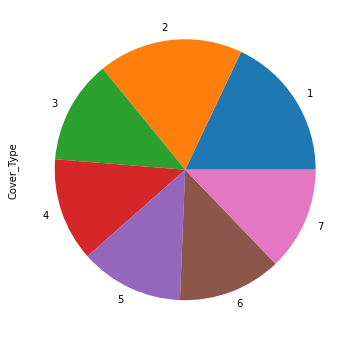

In [10]:
print(df.Cover_Type.value_counts())
df.Cover_Type.value_counts().plot.pie()

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [11]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [13]:
# to get list of continious features
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [14]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction

def detect_outliers(df, col_name,tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [17]:
out_cols = []
for col in numeric:
    print(
        f"{col}\nlower:{detect_outliers(df, col,3)[0]} \nupper:{detect_outliers(df, col,3)[1]}\
        \noutlier:{detect_outliers(df, col,3)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,3)[2] > 0 :
        out_cols.append(col)
print(out_cols)    

Elevation
lower:235.0 
upper:5303.0        
outlier:0
*-*-*-*-*-*-*
Aspect
lower:-540.0 
upper:867.0        
outlier:0
*-*-*-*-*-*-*
Slope
lower:-23.0 
upper:54.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Hydrology
lower:-725.0 
upper:1123.0        
outlier:30
*-*-*-*-*-*-*
Vertical_Distance_To_Hydrology
lower:-208.0 
upper:289.0        
outlier:46
*-*-*-*-*-*-*
Horizontal_Distance_To_Roadways
lower:-4217.0 
upper:7438.0        
outlier:0
*-*-*-*-*-*-*
Hillshade_9am
lower:75.0 
upper:355.0        
outlier:1
*-*-*-*-*-*-*
Hillshade_Noon
lower:127.0 
upper:316.0        
outlier:13
*-*-*-*-*-*-*
Hillshade_3pm
lower:-69.0 
upper:344.0        
outlier:0
*-*-*-*-*-*-*
Horizontal_Distance_To_Fire_Points
lower:-3188.25 
upper:6022.0        
outlier:95
*-*-*-*-*-*-*
['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points']


### Deal with Outliers

#### *ii. Drop Outliers*

In [18]:
out_cols

['Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points']

In [19]:
df1 = df.copy()

In [20]:
# We have decided to drop outliers over 1,5 iqr
for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]

In [21]:
df1.shape

(8235, 55)

In [22]:
df1 = df1.reset_index(drop=True)

In [23]:
for i in range(1,8) :
    print("the shape of the value of", i, df1[df1["Cover_Type"] == i].shape)

the shape of the value of 1 (1481, 55)
the shape of the value of 2 (1409, 55)
the shape of the value of 3 (1003, 55)
the shape of the value of 4 (1190, 55)
the shape of the value of 5 (1069, 55)
the shape of the value of 6 (1087, 55)
the shape of the value of 7 (996, 55)


### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___